In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from respy import capress

**Example 1.3** Capillary pressure curves.
An oil-water system has a capillary entry pressure, $p_\text{c,e}$ = 3.5 psi and $\lambda$ = 2.0. The
residual saturations are $S_\text{wr}$ = 0.1, $S_\text{or}$ = 0.2. The capillary pressure data were
measured for a 100 mD rock with 20% porosity and $\sigma_\text{ow}$ = 20 dyn/cm.
Estimate the capillary pressure at $S_\text{w}$ = 0.3 for a similar rock type but 50 mD,
15% porosity, and $\sigma_\text{ow}$ = 25 dyn/cm.

In [10]:
bc = capress.BrooksCorey(swr=0.1,sor=0.4,lamda=2.0,entry=3.5)

In [11]:
bc.dr.ss(0.3)

array([0.22222222])

In [12]:
bc.dr.pc(0.3)

array([7.4246212])

In [14]:
bc.im.se(0.3)

array([0.4])

In [15]:
bc.im.pc(0.3)

array([2.03398591])

In [16]:
jd = bc.dr.jf(0.3)

In [18]:
jd(perm=100,poro=0.2,ift=20)

array([8.30097886])

In [17]:
ji = bc.im.jf(0.3)

In [19]:
ji(perm=100,poro=0.2,ift=20)

array([2.27406537])

In [21]:
bc.dr.jf2pc(jd(perm=100,poro=0.2,ift=20),perm=50,poro=0.15,ift=25)

array([11.36658342])

In [22]:
bc.im.jf2pc(ji(perm=100,poro=0.2,ift=20),perm=50,poro=0.15,ift=25)

array([3.11389226])

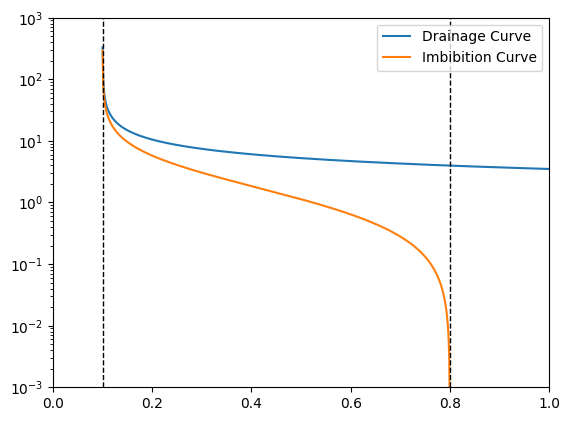

In [27]:
ow = capress.BrooksCorey(0.1,0.2,2,3.5)

sw = np.linspace(0,1,1000)

plt.semilogy(sw,ow.dr.pc(sw),label="Drainage Curve")
plt.semilogy(sw,ow.im.pc(sw),label="Imbibition Curve")

plt.vlines(0.1,1e-3,1e3,'k',linestyle='--',linewidth=1.)
plt.vlines(0.8,1e-3,1e3,'k',linestyle='--',linewidth=1.)

plt.xlim((0,1.))
plt.ylim((1e-3,1e3))

plt.legend()

plt.show()

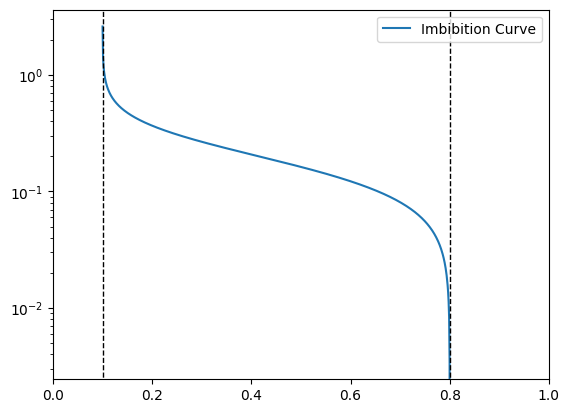

In [28]:
ow = capress.VanGenuchten(0.1,0.2,2,2,3.5)

sw = np.linspace(0,1,1000)

plt.semilogy(sw,ow.im.pc(sw),label="Imbibition Curve")

plt.vlines(0.1,1e-3,1e1,'k',linestyle='--',linewidth=1.)
plt.vlines(0.8,1e-3,1e1,'k',linestyle='--',linewidth=1.)

plt.xlim((0,1.))

plt.legend()

plt.show()